In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# To get data of any stock from its IPO onwards run the code below after changing the ticker
api_key = '0PUCAQTNVUA3MQHF'

# To get Apple stock market prices
ticker = "AAPL" 

# JSON file with all the stock market data for Apple 
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

# Saving data to csv file
file_to_save = 'stock_data-%s.csv'%ticker

# Storing date, low, high, volume, close and open values to a pandas dataframe
if not os.path.exists(file_to_save):
    with urllib.request.urlopen(url_string) as url:
        data = json.loads(url.read().decode())
        # extract stock market data
        data = data['Time Series (Daily)']
        df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
        for k,v in data.items():
            date = dt.datetime.strptime(k, '%Y-%m-%d')
            data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                        float(v['4. close']),float(v['1. open'])]
            df.loc[-1,:] = data_row
            df.index = df.index + 1
    print('Data saved to : %s'%file_to_save)        
    df.to_csv(file_to_save)
    
#after saving it, change to that directory and read the csv file after creating 2 datasets-train and test

In [7]:
dataset_train = pd.read_csv('stock_data-AAPL.csv')


In [14]:
# Sort by index
df = dataset_train.sort_values('Index')
print(df.shape)

(5018, 6)


In [23]:
#getting average price in a day
df['Mid']=(df['Low']+df['High'])/2.0
df.head()
df.shape

(5018, 7)

In [25]:
training_set = df.iloc[:, 6:].values # creating dataset with only mid price

In [26]:
df.iloc[:,6:]

,Mid
5017,124.310
5016,129.185
5015,137.970
5014,145.190
5013,139.720
...,...
4,296.705
3,294.330
2,292.190
1,279.480


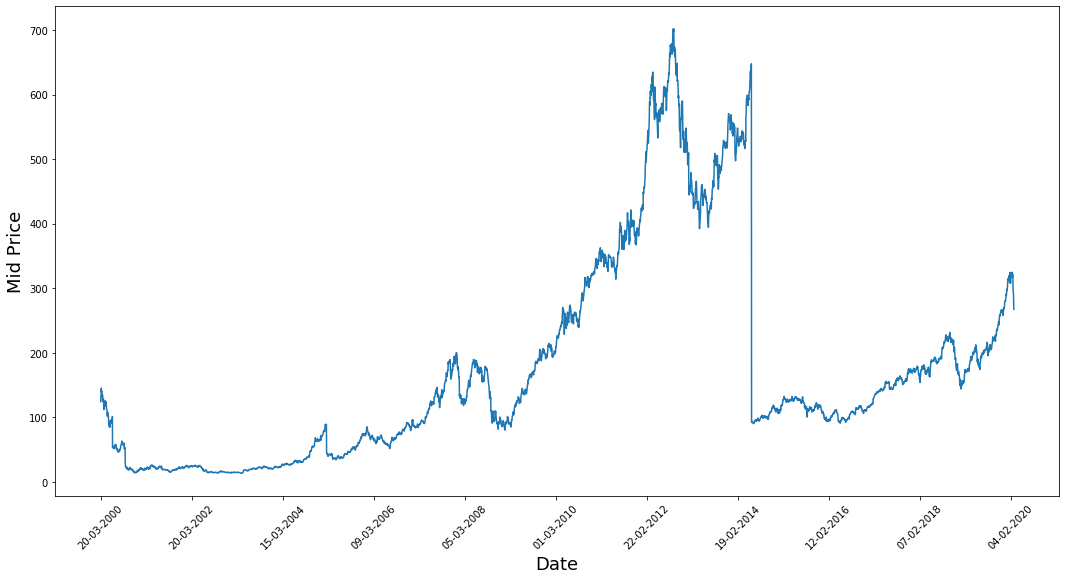

In [12]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()
#Fun Fact: Apple's fourth and final stock split happened on 9 June 2014. This was the most significant of Apple's stock splits, with a seven-to-one ratio taking shares from close to $700 down to around $100

In [27]:
#here we scale the data to have values in the range (0,1)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [70]:
X_train = []
y_train = []
#size is 5018
#here we are using a window size of 20; you can try using different other window sizes.
for i in range(20, 5018):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [71]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [72]:
#Building RNN model with lstm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [73]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [74]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [75]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
4998/4998 [==============================] - 10s 2ms/step - loss: 0.0079
Epoch 2/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0029
Epoch 3/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0028
Epoch 4/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0023
Epoch 5/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0020
Epoch 6/20
4998/4998 [==============================] - 9s 2ms/step - loss: 0.0020
Epoch 7/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0019
Epoch 8/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0015
Epoch 9/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0016
Epoch 10/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0016
Epoch 11/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0014
Epoch 12/20
4998/4998 [==============================] - 8s 2ms/step - loss: 0.0014


In [76]:
#making predictions
dataset_test = pd.read_csv('test_AAPL.csv')
dataset_test.head()

,Index,Date,Low,High,Close,Open
0,5032,20-03-2020,228.00,251.83,229.24,247.180
1,5031,19-03-2020,242.61,252.84,244.78,247.385
2,5030,18-03-2020,237.12,250.00,246.67,239.770
3,5029,17-03-2020,238.40,257.61,252.86,247.510
4,5028,16-03-2020,240.00,259.08,242.21,241.950


In [77]:
df_test = dataset_test.sort_values('Index')

df_test['Mid']=(df_test['Low']+df_test['High'])/2.0
real_stock_price = df_test.iloc[:, 6:].values
df_test.head()

,Index,Date,Low,High,Close,Open,Mid
14,5018,02-03-2020,277.72,301.44,298.81,282.28,289.580
13,5019,03-03-2020,285.80,304.00,289.32,303.67,294.900
12,5020,04-03-2020,293.13,303.40,302.74,296.44,298.265
11,5021,05-03-2020,291.41,299.55,292.92,295.52,295.480
10,5022,06-03-2020,281.23,290.82,289.03,282.00,286.025


In [78]:
dataset_total = pd.concat((df['Mid'], df_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 35):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

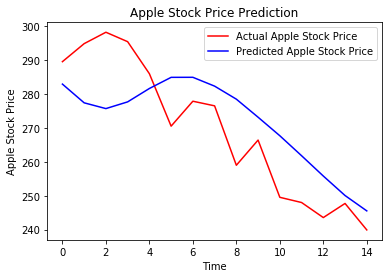

In [79]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Actual Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()